In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [64]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates= ['date'], \
    index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


##### Clean data

In [65]:
df = df[(df['value'] >= df.value.quantile(0.025)) & 
(df['value'] <= df.value.quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


##### Draw line plot

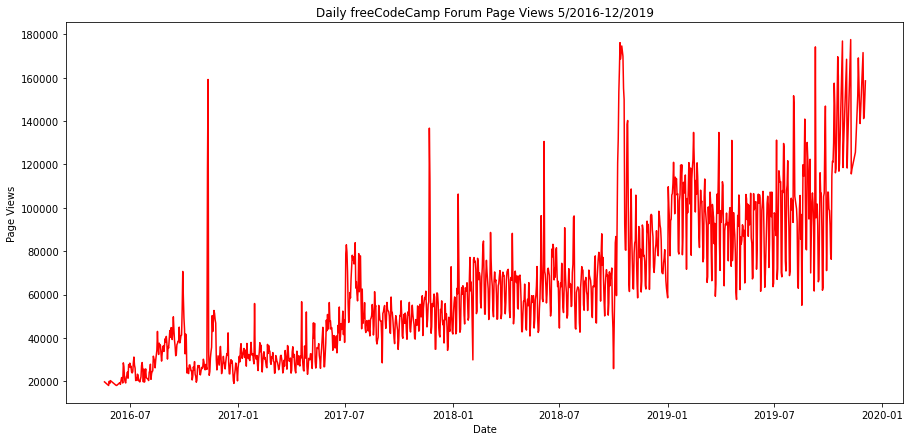

In [66]:
plt.subplots(figsize = (15,7));
plt.plot(df.index,df.value,'r');
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views");

##### Copy and modify data for monthly bar plot

In [67]:
df['year'], df['month'] = df.index.strftime('%Y'), df.index.strftime('%m')
df.head()

,value,year,month
date,,,
2016-05-19,19736,2016,05
2016-05-26,18060,2016,05
2016-05-27,19997,2016,05
2016-05-28,19044,2016,05
2016-05-29,20325,2016,05


In [68]:
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar.head()

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


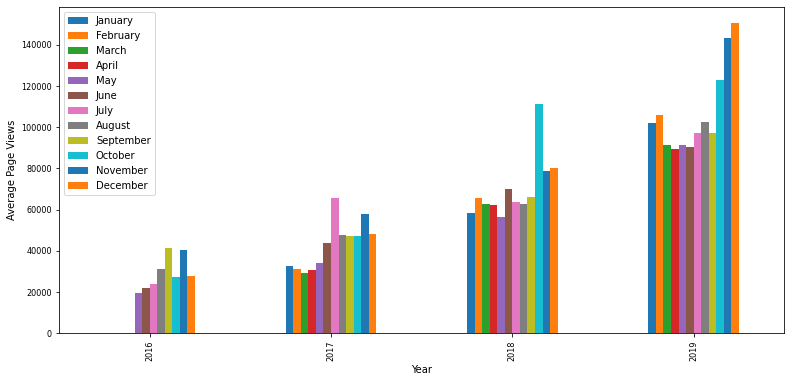

In [69]:
fig = df_bar.plot.bar(legend = True, figsize = (13,6), xlabel= \
    'Year', ylabel= "Average Page Views").figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', \
    'July', 'August', 'September', 'October', 'November', 'December']);
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);

##### Prepare data for box plots (this part is done!)

In [71]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


#### Draw box plots (using Seaborn)

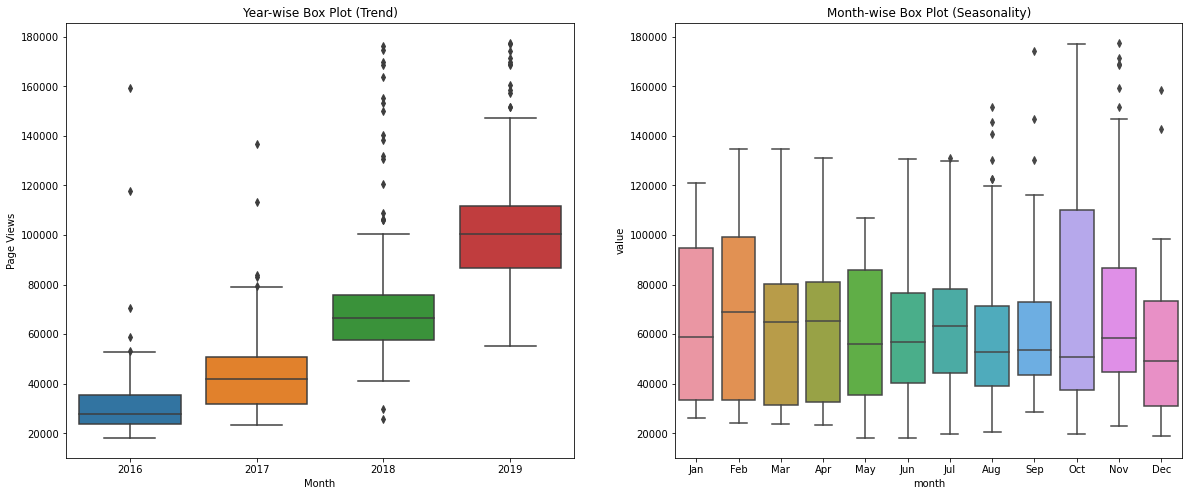

In [72]:
df_box['month_number'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_number')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
axes[0] = sns.boxplot(x= df_box['year'], y= df_box['value'], ax= axes[0])
axes[1] = sns.boxplot(x= df_box.month, y= df_box.value, ax= axes[1])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Page Views");